In [13]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from collections import Counter
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
from konlpy.tag import Mecab
mecab = Mecab()

In [14]:
df = pd.read_csv("./data/fintech_news3.csv")
df

,날짜,제목,원문링크,뉴스본문
0,2025-11-19,"한국핀테크지원센터, ‘제18회 대한민국소통어워즈’에서 2년 연속 3개 부문 대상 수상",https://www.joongang.co.kr/article/25383037,NaN
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [15]:
def text_clean(x):
    # 한글 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]'," ",x)
    cleaned = cleaned.replace("  "," ").replace("  "," ").strip()
    return cleaned

In [16]:
df = df.dropna()
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
5,2025-11-19,"금융위, 5대 금융지주 불러모아 “포용금융 적극 역할” 당부",https://n.news.naver.com/mnews/article/016/000...,"\n\n‘포용금융 소통·점검회의’ 개최기관별 지원현황, 준비상황 점검\n\n\n\n..."
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [17]:
df.loc[:,'제목'] = df['제목'].apply(text_clean)

In [18]:
df.loc[:,'뉴스본문'] = df['뉴스본문'].apply(text_clean)

In [19]:
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...


In [20]:
df['tokens'] = df['뉴스본문'].apply(mecab.nouns)
df

/tmp/ipykernel_3866/3460636742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['뉴스본문'].apply(mecab.nouns)


,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 등,..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 년, 금융, 특화, 계층, 역량, 강화, 과..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[년, 핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크,..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 수, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국,..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[시, 총, 조, 달러, 돌파, 미국, 반도체, 기업, 브로드컴, 일, 처음, 시가..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


In [23]:
df.loc[:,'tokens'] = df['tokens'].apply(lambda x: [word for word in x if len(word )> 1])
df

,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


# 단어 빈도수 체크

In [25]:
all_word_list = []
for row in df["tokens"].tolist():
    all_word_list += row

In [26]:
all_word_list[:3]

['한국', '핀테크', '지원']

In [30]:
stopwords = set([
    '은행','어플','뱅킹','앱','서비스','고객',
    '하나','국민','신한','우리','토스','카드','금융','기업','핀테크','한국','지난해'
])

In [31]:
filtered = [word for word in all_word_list if len(word) > 1 and word not in stopwords]

In [33]:
filtered[:10]

['지원', '센터', '산업', '성장', '기여', '최신', '트렌드', '반영', '교육', '과정']

In [34]:
word_freq = Counter(filtered)
word_freq

Counter({'대출': 25596,
         '금리': 20487,
         '투자': 20360,
         '시장': 20282,
         '보험': 19701,
         '지원': 19615,
         '자산': 16353,
         '미국': 14866,
         '가능': 12925,
         '상품': 12536,
         '기준': 12202,
         '코인': 10994,
         '뱅크': 10798,
         '결제': 10492,
         '제공': 10319,
         '스테이': 9534,
         '달러': 9349,
         '규제': 9309,
         '기술': 9010,
         '거래': 8977,
         '경우': 8925,
         '사업': 8769,
         '확대': 8720,
         '국내': 8689,
         '평가': 8635,
         '중국': 8620,
         '관리': 8582,
         '디지털': 8458,
         '필요': 8375,
         '관련': 8259,
         '올해': 8204,
         '규모': 8192,
         '증가': 8121,
         '수익': 8077,
         '당국': 7835,
         '자금': 7808,
         '정책': 7776,
         '증권': 7741,
         '정부': 7579,
         '이상': 7511,
         '제도': 7503,
         '신용': 7477,
         '대상': 7454,
         '최근': 7357,
         '신청': 7291,
         '강화': 7237,
         '정보': 71

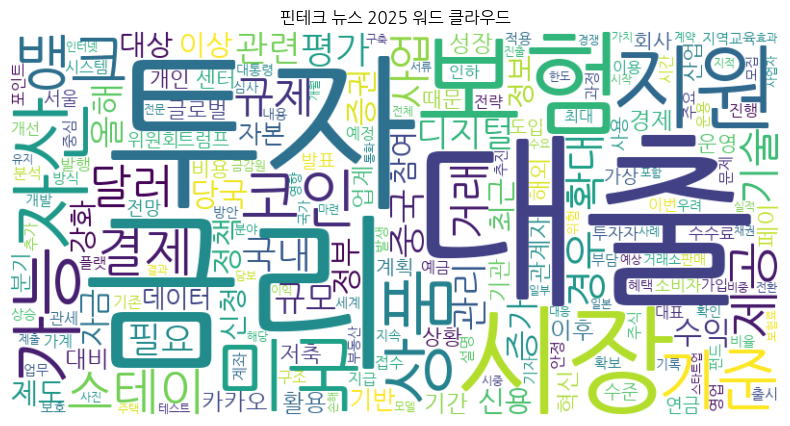

In [36]:
wc = WordCloud(
    font_path='NanumGothic.ttf',
    background_color= 'white',
    width=800,
    height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 2025 워드 클라우드")
plt.show()

# word2vec,LDA 토픽 모델링, T-sne 시각화

In [39]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [58]:
def find_optimal_topics(tokenized_texts, start=2, end=8):
    # texts는 문자열 리스트

    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    print(f"최적 토픽수: {best_n} (score: {best_score:.4f})")
    return best_n

In [40]:
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=8, sg=1)

In [43]:
def topic_modeling(tokenized_texts_df,w2v_model,month):
    
    print("--- 토픽 모델링 시작 ---")
    
    # 최적 토픽 수 탐색
    try:
        print(f"\n핀테크 뉴스 2025 {month}월 최적 토픽 수 계산 중...")
        best_k = find_optimal_topics(tokenized_texts_df)
    except Exception as e:
        print(f"\n핀테크 뉴스 2025 {month}월 최적 토픽 수 계산 오류{e}")


    # CountVectorizer
    try:
        vectorizer = CountVectorizer(tokenizer=lambda x: x, token_pattern=None, lowercase=False, max_df=0.9, min_df=5)
        review_vec = vectorizer.fit_transform(tokenized_texts_df)

        if review_vec.shape[1] == 0:
            print(f"\n핀테크 뉴스 2025 {month}월 min_df 조건 만족 단어 없음 - 스킵")

        # LDA 학습
        lda_model = LatentDirichletAllocation(n_components=best_k, random_state=42)
        lda_model.fit(review_vec)

        words = vectorizer.get_feature_names_out()

        # 토픽별 상위 단어 출력 + 전체 단어 set에 모으기
        all_topic_words = set()
        print(f"\n핀테크 뉴스 2025 {month}월 토픽별 상위 단어 (k={best_k})")
        print("=" * 60)
        for i, topic in enumerate(lda_model.components_):
            top = [words[idx] for idx in topic.argsort()[-10:]]
            print(f"Topic #{i}: {top}")
            all_topic_words.update(top)

        print(f"토픽 단어 총 {len(all_topic_words)}개")

        # 토픽 단어 중 word2vec에 있는 것만 사용해서 시각화
        valid_words = [word for word in all_topic_words if word in w2v_model.wv]
        print(f"word2vec에 포함된 토픽 단어 수: {len(valid_words)}개")

        vectors = np.array([w2v_model.wv[word] for word in valid_words])

        tsne_perplexity = min(10, len(valid_words) -1)
        if tsne_perplexity < 2:
            tsne_perplexity = 2

        tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
        reduced_vecs = tsne.fit_transform(vectors)

        # tsne 시각화

        plt.figure(figsize=(10, 6))
        for i, word in enumerate(valid_words):
            x, y = reduced_vecs[i]
            plt.scatter(x, y)
            plt.text(x + 0.01, y +0.01, word, fontsize=12)
        plt.title(f"\n핀테크 뉴스 2025 {month}월 토픽 단어의 Word2Vec 유사도 기반 시각화 (T-SNE)")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(e)

In [52]:
df['날짜'] = pd.to_datetime(df['날짜'])
df

/tmp/ipykernel_3866/1526978612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = pd.to_datetime(df['날짜'])


,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 1월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4708
토픽수: 3, Coherence Score: 0.4061
토픽수: 4, Coherence Score: 0.4848
토픽수: 5, Coherence Score: 0.4947
토픽수: 6, Coherence Score: 0.5531
토픽수: 7, Coherence Score: 0.5352
토픽수: 8, Coherence Score: 0.5280
최적 토픽수: 6 (score: 0.5531)

핀테크 뉴스 2025 1월 토픽별 상위 단어 (k=6)
Topic #0: ['정책', '대통령', '경제', '시장', '기술', '달러', '기업', '중국', '트럼프', '미국']
Topic #1: ['결제', '디지털', '토스', '은행', '카카오', '제공', '페이', '고객', '서비스', '금융']
Topic #2: ['판매', '가입', '손해', '세대', '혜택', '보험료', '상품', '수수료', '카드', '보험']
Topic #3: ['자본', '주식', '거래', '투자자', '증권', '금융', '가상', '시장', '투자', '자산']
Topic #4: ['인턴', '제공', '센터', '한국', '퇴직', '모집', '연금', '기업', '지원', '핀테크']
Topic #5: ['올해', '가계', '뱅크', '인하', '기준', '지난해', '금융', '금리', '대출', '은행']
토픽 단어 총 54개
word2vec에 포함된 토픽 단어 수: 54개


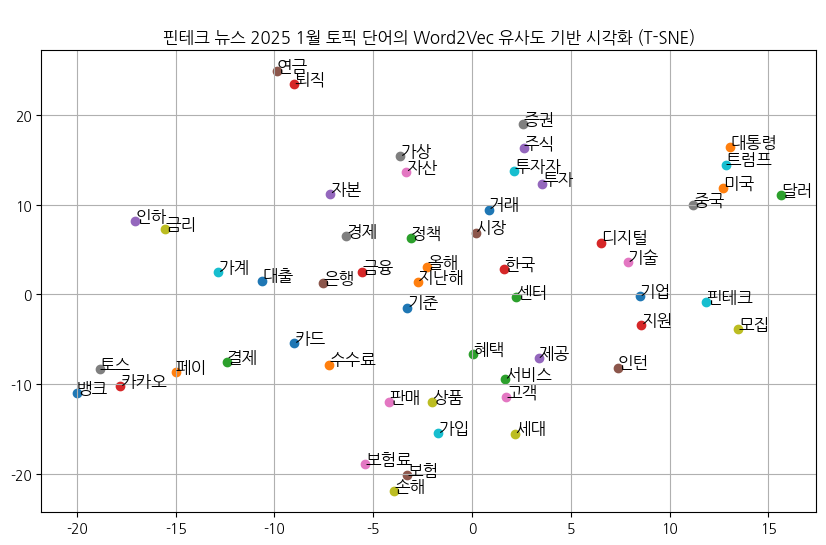

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 2월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3947
토픽수: 3, Coherence Score: 0.4800
토픽수: 4, Coherence Score: 0.5017
토픽수: 5, Coherence Score: 0.5588
토픽수: 6, Coherence Score: 0.5778
토픽수: 7, Coherence Score: 0.6027
토픽수: 8, Coherence Score: 0.6164
최적 토픽수: 8 (score: 0.6164)

핀테크 뉴스 2025 2월 토픽별 상위 단어 (k=8)
Topic #0: ['거래', '거래소', '대출', '금융', '시장', '예금', '기준', '인하', '은행', '금리']
Topic #1: ['자본', '강화', '시장', '계획', '당국', '회사', '관련', '검사', '금감원', '금융']
Topic #2: ['시장', '투자', '경제', '대통령', '정책', '관세', '달러', '트럼프', '중국', '미국']
Topic #3: ['저축', '신용', '카드', '가계', '증가', '뱅크', '지난해', '금융', '대출', '은행']
Topic #4: ['가입', '판매', '수익', '지난해', '금융', '증권', '연금', '투자', '상품', '보험']
Topic #5: ['서비스', '데이터', '투자', '금융', '지원', '사업', '가상', '핀테크', '자산', '기업']
Topic #6: ['서비스', '비용', '기업', '핀테크', '지원', '수수료', '금융', '결제', '페이', '카드']
Topic #7: ['업계', '유통', '손해', '자동차', '기업', '조각', '증권', '보험', '발행', '투자']
토픽 단어 총 59개
word2vec에 포함된 토픽 단어 수: 59개


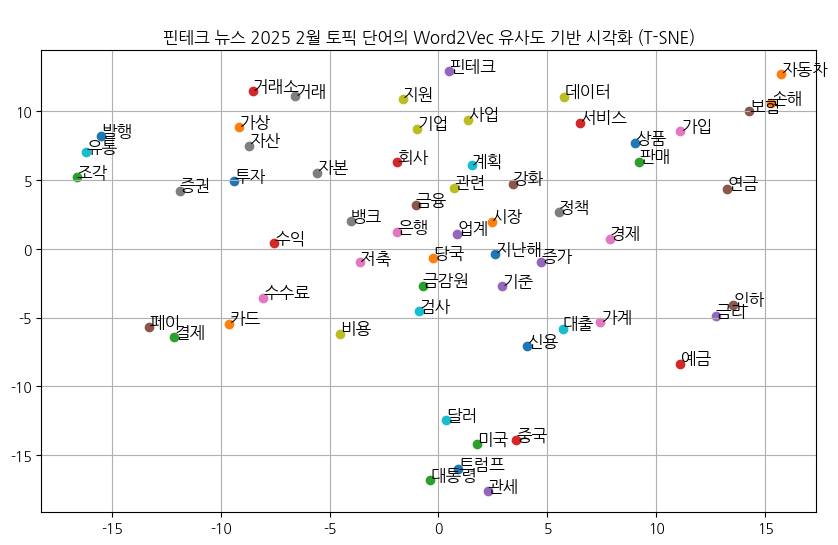

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 3월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3643
토픽수: 3, Coherence Score: 0.3885
토픽수: 4, Coherence Score: 0.4354
토픽수: 5, Coherence Score: 0.5076
토픽수: 6, Coherence Score: 0.5152
토픽수: 7, Coherence Score: 0.5093
토픽수: 8, Coherence Score: 0.5582
최적 토픽수: 8 (score: 0.5582)

핀테크 뉴스 2025 3월 토픽별 상위 단어 (k=8)
Topic #0: ['퇴직', '수익', '상품', '계좌', '가입', '투자', '발행', '금융', '증권', '연금']
Topic #1: ['접수', '비용', '심사', '테스트', '모집', '사업', '핀테크', '금융', '기업', '지원']
Topic #2: ['정부', '투자', '대통령', '정책', '경제', '기업', '트럼프', '관세', '중국', '미국']
Topic #3: ['기관', '회사', '관리', '기업', '관련', '정보', '데이터', '강화', '금감원', '금융']
Topic #4: ['소비자', '보험료', '금융', '상품', '수수료', '결제', '서비스', '페이', '카드', '보험']
Topic #5: ['증가', '가계', '지난해', '기준', '공매도', '저축', '금융', '대출', '금리', '은행']
Topic #6: ['지난해', '인터넷', '토스', '서비스', '고객', '신용', '대출', '뱅크', '금융', '은행']
Topic #7: ['디지털', '코인', '투자자', '거래소', '달러', '투자', '가상', '거래', '시장', '자산']
토픽 단어 총 66개
word2vec에 포함된 토픽 단어 수: 66개


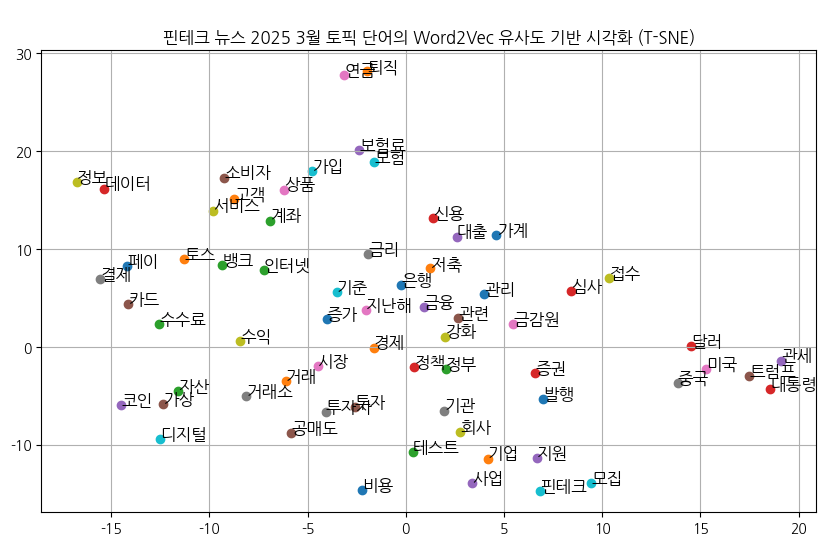

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 4월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4288
토픽수: 3, Coherence Score: 0.5058
토픽수: 4, Coherence Score: 0.5420
토픽수: 5, Coherence Score: 0.5663
토픽수: 6, Coherence Score: 0.5782
토픽수: 7, Coherence Score: 0.5712
토픽수: 8, Coherence Score: 0.5495
최적 토픽수: 6 (score: 0.5782)

핀테크 뉴스 2025 4월 토픽별 상위 단어 (k=6)
Topic #0: ['평가', '기준', '테스트', '비용', '기업', '금융', '지원', '금리', '은행', '대출']
Topic #1: ['무역', '경제', '시장', '기업', '대통령', '달러', '트럼프', '중국', '관세', '미국']
Topic #2: ['참여', '스타트업', '모집', '한국', '센터', '핀테크', '기술', '기업', '지원', '금융']
Topic #3: ['달러', '금융', '시장', '은행', '가상', '디지털', '스테이', '결제', '자산', '코인']
Topic #4: ['제공', '토스', '뱅크', '은행', '상품', '고객', '카드', '보험', '금융', '서비스']
Topic #5: ['연금', '자본', '보험', '수익', '자산', '증권', '시장', '은행', '투자', '금융']
토픽 단어 총 45개
word2vec에 포함된 토픽 단어 수: 45개


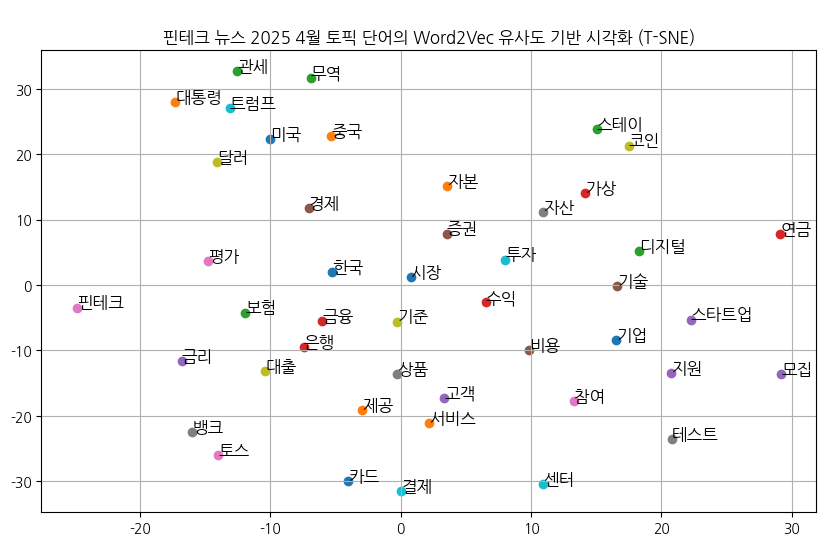

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 5월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4339
토픽수: 3, Coherence Score: 0.4105
토픽수: 4, Coherence Score: 0.4638
토픽수: 5, Coherence Score: 0.5304
토픽수: 6, Coherence Score: 0.5341
토픽수: 7, Coherence Score: 0.5481
토픽수: 8, Coherence Score: 0.5476
최적 토픽수: 7 (score: 0.5481)

핀테크 뉴스 2025 5월 토픽별 상위 단어 (k=7)
Topic #0: ['혜택', '심사', '핀테크', '접수', '지원', '지역', '모집', '금융', '외국인', '카드']
Topic #1: ['금융', '거래', '시장', '디지털', '가상', '달러', '결제', '자산', '스테이', '코인']
Topic #2: ['정보', '제공', '토스', '상품', '연금', '은행', '뱅크', '고객', '서비스', '금융']
Topic #3: ['센터', '평가', '비용', '금융', '접수', '신청', '테스트', '핀테크', '기업', '지원']
Topic #4: ['달러', '대통령', '무역', '경제', '시장', '트럼프', '관세', '중국', '미국', '보험']
Topic #5: ['증가', '예금', '신용', '기준', '저축', '분기', '금융', '금리', '대출', '은행']
Topic #6: ['투자자', '규제', '상장', '펀드', '증권', '기업', '자본', '시장', '투자', '금융']
토픽 단어 총 57개
word2vec에 포함된 토픽 단어 수: 57개


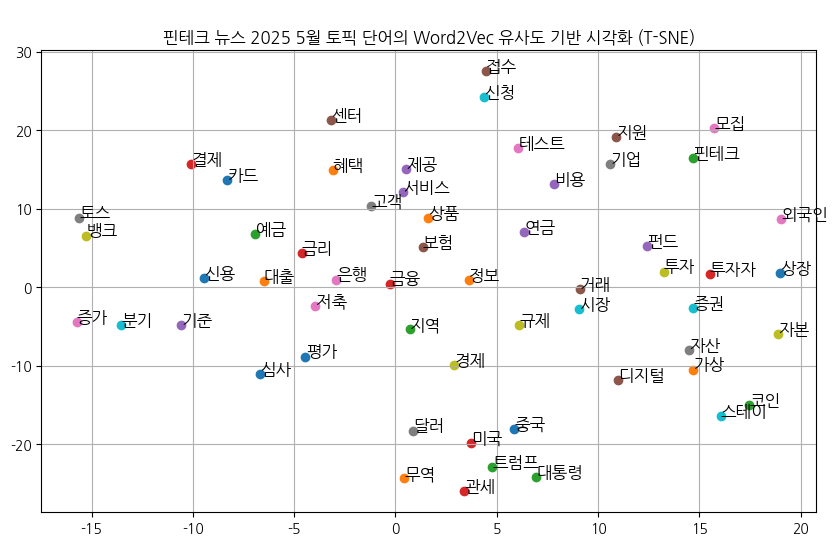

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 6월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4731
토픽수: 3, Coherence Score: 0.4533
토픽수: 4, Coherence Score: 0.5525
토픽수: 5, Coherence Score: 0.5471
토픽수: 6, Coherence Score: 0.5863
토픽수: 7, Coherence Score: 0.6085
토픽수: 8, Coherence Score: 0.5817
최적 토픽수: 7 (score: 0.6085)

핀테크 뉴스 2025 6월 토픽별 상위 단어 (k=7)
Topic #0: ['기업', '증권', '상품', '자산', '연금', '서비스', '금융', '시장', '데이터', '투자']
Topic #1: ['제출', '평가', '테스트', '접수', '신청', '투자', '금융', '핀테크', '기업', '지원']
Topic #2: ['인하', '예금', '주택', '증가', '기준', '가계', '금융', '은행', '금리', '대출']
Topic #3: ['트럼프', '경제', '일본', '자본', '투자', '정책', '기업', '달러', '시장', '미국']
Topic #4: ['통제', '보험료', '상품', '판매', '계약', '보장', '손해', '미국', '중국', '보험']
Topic #5: ['확대', '제공', '신용', '대출', '토스', '고객', '서비스', '뱅크', '은행', '금융']
Topic #6: ['시장', '발행', '디지털', '금융', '페이', '자산', '카드', '결제', '스테이', '코인']
토픽 단어 총 54개
word2vec에 포함된 토픽 단어 수: 54개


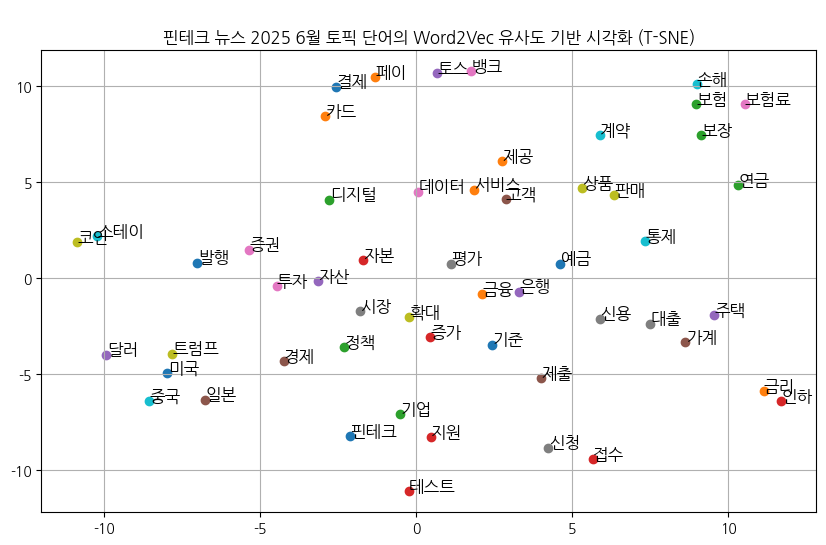

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 7월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5187
토픽수: 3, Coherence Score: 0.4681
토픽수: 4, Coherence Score: 0.5682
토픽수: 5, Coherence Score: 0.5684
토픽수: 6, Coherence Score: 0.5364
토픽수: 7, Coherence Score: 0.5086
토픽수: 8, Coherence Score: 0.5749
최적 토픽수: 8 (score: 0.5749)

핀테크 뉴스 2025 7월 토픽별 상위 단어 (k=8)
Topic #0: ['제공', '수수료', '토스', '고객', '금융', '카드', '서비스', '카카오', '은행', '뱅크']
Topic #1: ['국가', '합의', '무역', '협상', '달러', '대통령', '트럼프', '관세', '중국', '미국']
Topic #2: ['거래소', '자산', '거래', '페이', '서비스', '금융', '결제', '시장', '투자', '보험']
Topic #3: ['자산', '투자', '기준', '수익', '예금', '상품', '저축', '금리', '은행', '금융']
Topic #4: ['신용', '카드', '주택', '보험', '규제', '금리', '가계', '금융', '은행', '대출']
Topic #5: ['은행', '결제', '발행', '달러', '디지털', '시장', '금융', '자산', '스테이', '코인']
Topic #6: ['교육', '기술', '보이스', '피싱', '활용', '과정', '평가', '정보', '데이터', '금융']
Topic #7: ['제공', '서류', '한국', '센터', '교육', '신청', '참여', '지원', '핀테크', '기업']
토픽 단어 총 60개
word2vec에 포함된 토픽 단어 수: 60개


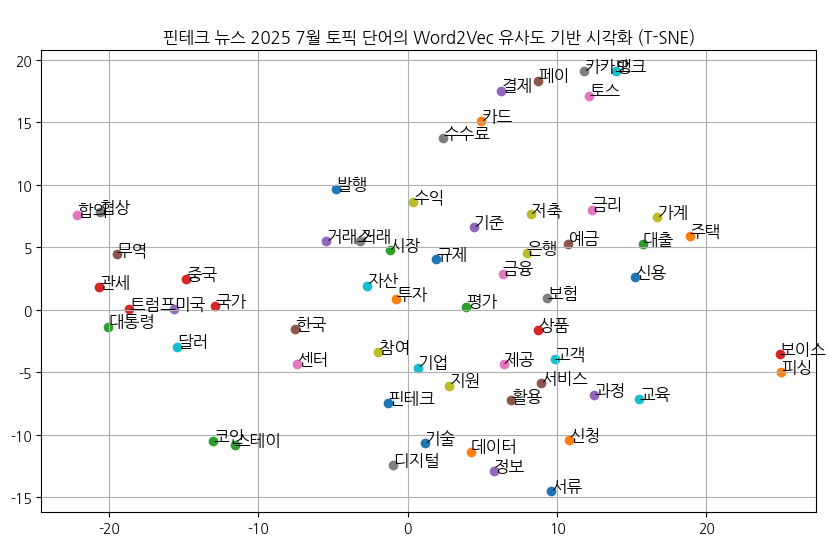

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 8월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4822
토픽수: 3, Coherence Score: 0.4790
토픽수: 4, Coherence Score: 0.5652
토픽수: 5, Coherence Score: 0.5788
토픽수: 6, Coherence Score: 0.5802
토픽수: 7, Coherence Score: 0.5875
토픽수: 8, Coherence Score: 0.5940
최적 토픽수: 8 (score: 0.5940)

핀테크 뉴스 2025 8월 토픽별 상위 단어 (k=8)
Topic #0: ['인하', '규제', '시장', '가계', '기준', '신용', '금리', '은행', '금융', '대출']
Topic #1: ['금융', '참여', '진출', '발표', '서류', '신청', '해외', '지원', '기업', '핀테크']
Topic #2: ['고객', '분석', '기반', '참여', '활용', '정보', '서비스', '지원', '데이터', '금융']
Topic #3: ['사례', '경제', '정부', '기업', '대통령', '트럼프', '관세', '금융', '중국', '미국']
Topic #4: ['토스', '고객', '금융', '카카오', '페이', '은행', '뱅크', '서비스', '결제', '카드']
Topic #5: ['참여', '대상', '기업', '센터', '한국', '지원', '금융', '과정', '핀테크', '교육']
Topic #6: ['예금', '보험료', '손해', '가입', '상품', '금융', '연금', '저축', '은행', '보험']
Topic #7: ['디지털', '달러', '가상', '기업', '금융', '투자', '시장', '자산', '스테이', '코인']
토픽 단어 총 60개
word2vec에 포함된 토픽 단어 수: 60개


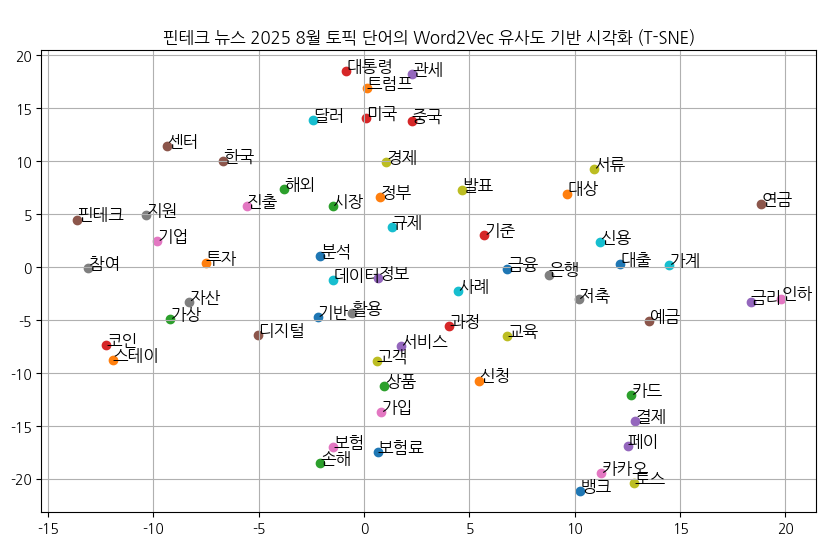

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 9월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3920
토픽수: 3, Coherence Score: 0.4267
토픽수: 4, Coherence Score: 0.5397
토픽수: 5, Coherence Score: 0.4697
토픽수: 6, Coherence Score: 0.5450
토픽수: 7, Coherence Score: 0.5256
토픽수: 8, Coherence Score: 0.5320
최적 토픽수: 6 (score: 0.5450)

핀테크 뉴스 2025 9월 토픽별 상위 단어 (k=6)
Topic #0: ['정부', '혁신', '성장', '글로벌', '기술', '중국', '시장', '기업', '미국', '투자']
Topic #1: ['강화', '신용', '기업', '뱅크', '소비자', '규제', '금리', '대출', '은행', '금융']
Topic #2: ['결제', '투자', '은행', '고객', '연금', '서비스', '카드', '금융', '상품', '금리']
Topic #3: ['고객', '대상', '과정', '신탁', '활용', '센터', '데이터', '서비스', '금융', '교육']
Topic #4: ['시장', '가상', '디지털', '달러', '발행', '결제', '금융', '자산', '스테이', '코인']
Topic #5: ['심사', '한국', '센터', '아이디어', '신청', '기업', '금융', '보험', '지원', '핀테크']
토픽 단어 총 46개
word2vec에 포함된 토픽 단어 수: 46개


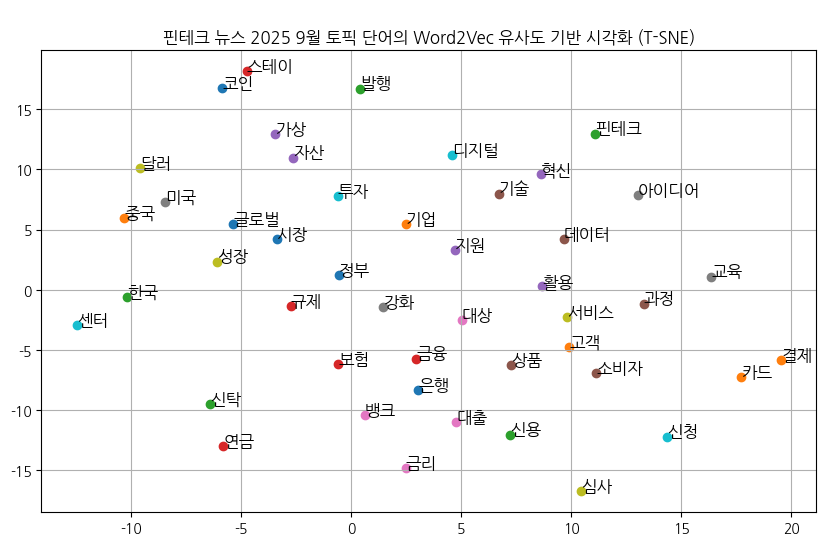

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 10월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4133
토픽수: 3, Coherence Score: 0.4245
토픽수: 4, Coherence Score: 0.4338
토픽수: 5, Coherence Score: 0.4325
토픽수: 6, Coherence Score: 0.4681
토픽수: 7, Coherence Score: 0.4734
토픽수: 8, Coherence Score: 0.5270
최적 토픽수: 8 (score: 0.5270)

핀테크 뉴스 2025 10월 토픽별 상위 단어 (k=8)
Topic #0: ['가계', '규제', '저축', '데이터', '신용', '뱅크', '금리', '금융', '은행', '대출']
Topic #1: ['전망', '은행', '인하', '기준', '투자', '시장', '분기', '금융', '수익', '금리']
Topic #2: ['투자', '소비자', '위원회', '거래', '보호', '보안', '서비스', '은행', '정보', '금융']
Topic #3: ['미국', '시장', '중국', '기술', '자산', '산업', '기업', '스테이', '코인', '금융']
Topic #4: ['생명', '손해', '제도', '보험금', '보험료', '금융', '연금', '상품', '카드', '보험']
Topic #5: ['과정', '한국', '참여', '금융', '신청', '센터', '교육', '기업', '지원', '핀테크']
Topic #6: ['주식', '투자자', '가상', '거래소', '거래', '투자', '시장', '미국', '자산', '달러']
Topic #7: ['협력', '제공', '기술', '투자', '네이버', '스타트업', '페이', '서비스', '기업', '결제']
토픽 단어 총 60개
word2vec에 포함된 토픽 단어 수: 60개


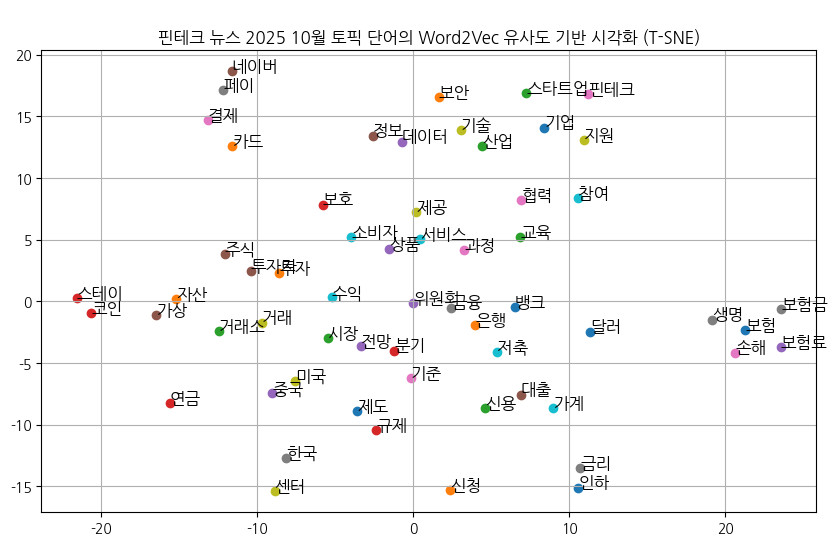

--- 토픽 모델링 시작 ---

핀테크 뉴스 2025 11월 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4255
토픽수: 3, Coherence Score: 0.4205
토픽수: 4, Coherence Score: 0.4578
토픽수: 5, Coherence Score: 0.4864
토픽수: 6, Coherence Score: 0.5245
토픽수: 7, Coherence Score: 0.4882
토픽수: 8, Coherence Score: 0.4682
최적 토픽수: 6 (score: 0.5245)

핀테크 뉴스 2025 11월 토픽별 상위 단어 (k=6)
Topic #0: ['주식', '자본', '투자자', '발행', '거래', '증권', '자산', '시장', '금융', '투자']
Topic #1: ['금융', '산업', '투자', '경제', '정부', '기업', '달러', '중국', '데이터', '미국']
Topic #2: ['카카오', '증가', '신용', '뱅크', '분기', '금융', '카드', '금리', '대출', '은행']
Topic #3: ['데이터', '활용', '시장', '기반', '기술', '디지털', '기업', '서비스', '결제', '금융']
Topic #4: ['보험료', '지주', '대출', '개선', '소비자', '관리', '당국', '자본', '보험', '금융']
Topic #5: ['한국', '센터', '참여', '교육', '신청', '스테이', '코인', '기업', '지원', '핀테크']
토픽 단어 총 49개
word2vec에 포함된 토픽 단어 수: 49개


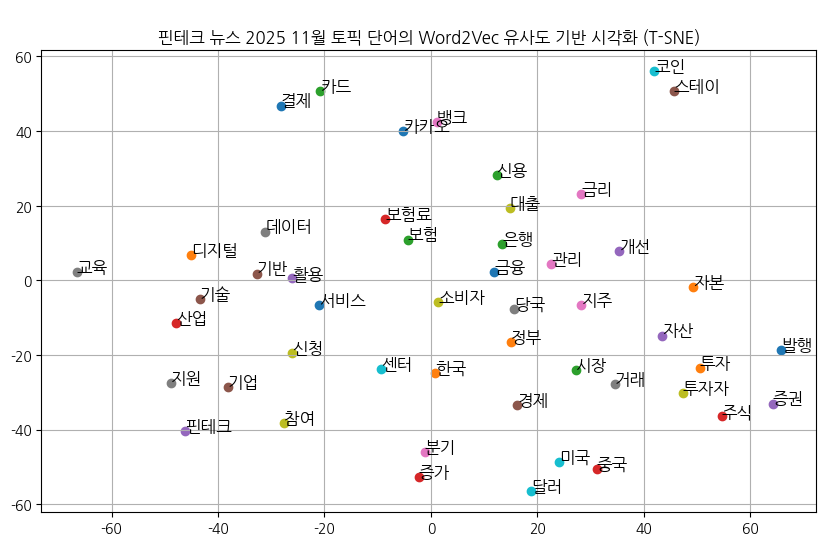

In [59]:
for month in range(1,12):
    topic_modeling(df.loc[df['날짜'].dt.month == month, 'tokens'],w2v_model,month)

In [64]:
#!pip install python-dotenv
#!pip install google-genai

In [69]:
import os
from dotenv import load_dotenv
load_dotenv("./.env_gemini")
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

In [70]:
from google import genai

In [72]:
# The client gets the API key from the environment variable `GEMINI_API_KEY`.
client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash", contents="핀테크에 대해서 알려줘"
)
print(response.text)

"핀테크(FinTech)"는 **Finance(금융)**와 **Technology(기술)**의 합성어로, 정보 기술을 활용하여 기존 금융 서비스를 혁신하고 개선하는 모든 활동을 의미합니다.

쉽게 말해, **기술을 통해 금융을 더 편리하고, 효율적이며, 저렴하고, 접근하기 쉽게 만드는 것**이라고 할 수 있습니다.

---

### 핀테크의 주요 특징 및 장점

1.  **편의성 및 접근성 향상:** 스마트폰 앱 하나로 계좌 개설, 송금, 결제, 투자 등 다양한 금융 서비스를 시간과 장소에 구애받지 않고 이용할 수 있게 됩니다. 금융 소외 계층도 쉽게 금융 서비스를 이용할 수 있게 됩니다.
2.  **비용 절감 및 효율 증대:** 자동화된 시스템과 온라인 기반 서비스로 인해 인건비, 지점 운영비 등 불필요한 비용이 줄어들어 더 저렴한 수수료로 서비스를 제공할 수 있습니다.
3.  **개인 맞춤형 서비스:** 빅데이터와 인공지능 분석을 통해 개인의 소비 패턴, 투자 성향 등을 파악하여 최적화된 금융 상품이나 자문 서비스를 제공합니다.
4.  **혁신적인 비즈니스 모델:** 기존 금융권에서는 불가능했던 새로운 형태의 서비스(예: P2P 대출, 크라우드 펀딩)를 가능하게 합니다.

### 핀테크에 활용되는 주요 기술

*   **빅데이터 (Big Data):** 방대한 금융 데이터를 분석하여 신용 평가, 맞춤형 상품 추천, 사기 탐지 등에 활용합니다.
*   **인공지능 (AI) / 머신러닝 (Machine Learning):** 챗봇을 통한 고객 상담, 로보 어드바이저를 통한 자산 관리, 신용 평가 모델 고도화, 이상 거래 감지 등에 사용됩니다.
*   **블록체인 (Blockchain):** 분산 원장 기술을 통해 거래의 투명성과 보안성을 높이고, 암호화폐, 스마트 컨트랙트, 해외 송금 등에 활용됩니다.
*   **클라우드 컴퓨팅 (Cloud Computing):** 유연하고 확장 가능한 IT 인프라를 제공하여 핀테크 기업들이 저비용으로 서비스를 개발하고 운영할

# 핀테크 뉴스 제목을 분기별로 gemini에게 요약시키고 아이디어 물어보기

In [77]:
titles = " ".join(df.loc[(df['날짜'].dt.month >= 1) & (df['날짜'].dt.month <= 3 ),'제목'].tolist())

In [78]:
len(titles)

94523

In [79]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{titles}\n위의 글은 핀테크 관련 뉴스 제목들이야
    이 제목을 분석해서 어떤 이슈들이 중요한 사건이었는지 분석하고, 그 내용을 토대로
    새로운 핀테크 서비스를 기획할 떄 사용할 수 있을 만한 아이디어 5개 제시해줘"""
)
print(response.text)

## 핀테크 뉴스 주요 이슈 분석

제공된 뉴스 제목들을 분석한 결과, 핀테크 산업에서 다음 7가지 핵심 이슈가 중요하게 다뤄지고 있음을 알 수 있습니다.

1.  **인터넷전문은행(인뱅)의 성장과 변화, 그리고 제4인뱅 경쟁 심화:**
    *   **내용:** 카카오뱅크, 케이뱅크, 토스뱅크 등 기존 인뱅 3사의 실적 성장, 사업 확장(주담대, 기업금융, 해외 진출), 그리고 '이자장사' 비판 속에서의 '포용금융' 이행에 대한 논란이 지속되고 있습니다. 동시에 한국소호은행, 유뱅크, 더존뱅크 등 제4인뱅 후보들의 인가 경쟁이 뜨거워지며 금융 시장의 '메기 효과'에 대한 기대와 우려가 교차하고 있습니다.
    *   **키워드:** 제4인뱅, 카카오뱅크, 케이뱅크, 토스뱅크, 주담대, 기업금융, 포용금융, 이자장사, 컨소시엄.

2.  **AI(인공지능) 및 디지털 전환 가속화:**
    *   **내용:** 금융권 전반에서 생성형 AI, LLM(대규모 언어 모델) 도입, AI 기반 자산관리(RA), 대안신용평가 모델 개발, 사이버 보안 강화 등 AI 기술 활용이 활발합니다. 금융당국도 AI 지원 정책을 발표하고 '금융 특화 한글 말뭉치' 제공 등을 통해 혁신을 독려하고 있습니다.
    *   **키워드:** AI, 생성형 AI, LLM, 디지털 전환, 대안신용평가, 금융보안원, 금융특화 말뭉치, 로보어드바이저.

3.  **가상자산(암호화폐) 시장의 제도화 및 확장:**
    *   **내용:** 법인 가상자산 투자 허용 논의, 가상자산 2단계 입법 추진, 현물 ETF 도입 논의, CBDC(중앙은행 디지털화폐) 실거래 실험 계획 등 가상자산 시장이 제도권으로 편입되고 확장될 조짐을 보이고 있습니다. 이에 따라 은행권의 가상자산 시장 진출 및 제휴 경쟁도 가속화될 전망입니다.
    *   **키워드:** 가상자산, 법인계좌, 현물 ETF, CBDC, 스테이블코인, 특금법, 가상자산거래소.

4.  **금융당국의 규제 및 지원 정책 강화:**
   

# 분기별로 분석

In [80]:
results = ""
for mon in range(1,13,3):
    titles = " ".join(df.loc[(df['날짜'].dt.month >= mon) & (df['날짜'].dt.month <= mon+2 ),'제목'].tolist())
    response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{titles}\n위의 글은 핀테크 관련 뉴스 제목들이야
    이 제목을 분석해서 어떤 이슈들이 중요한 사건이었는지 분석하고, 그 내용을 토대로
    새로운 핀테크 서비스를 기획할 떄 사용할 수 있을 만한 아이디어 5개 제시해줘"""
    )
    results += "\n"+response.text
print(results)


제공된 핀테크 뉴스 제목들을 분석하여 중요한 이슈들을 파악하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어를 제시합니다.

---

### **1. 주요 이슈 분석**

뉴스 제목들을 통해 다음과 같은 핵심 핀테크 트렌드와 이슈들을 도출할 수 있습니다.

1.  **인터넷은행의 성장과 경쟁 심화 (feat. 제4인터넷은행):**
    *   카카오뱅크, 케이뱅크, 토스뱅크 등 기존 인터넷은행들의 폭발적인 성장 (순익 급증), 대출 상품 확대 (주담대, 전월세보증금대출, 개인사업자 대출), 해외 진출 모색 (카뱅-태국).
    *   제4인터넷은행 인가 논의가 활발하며, 소상공인/중소기업, 시니어 등 특정 고객층에 특화된 은행 설립에 대한 기대와 경쟁이 뜨겁습니다. (한국소호은행, 유뱅크, 더존비즈온 등 컨소시엄).
    *   기존 은행들과의 경쟁 심화 및 협력 (대안신용평가 모델 개발, 공동대출).

2.  **AI 및 디지털 전환 가속화:**
    *   금융권 전반(금융위, 금감원, 한은, 시중은행, 핀테크)에서 생성형 AI, LLM, 로보어드바이저 도입 및 지원 움직임이 활발합니다.
    *   AI를 활용한 금융 특화 말뭉치 제공, 퇴직연금 자동운용, 신용평가 모델 개발, 사기 예방, 자산 관리, 업무 효율화 등 다양한 분야에서 활용됩니다.
    *   디지털 금융 사각지대 해소 (AI 뱅커, 금융 교육) 및 사이버 보안 강화에 대한 중요성이 강조됩니다.

3.  **가상자산(디지털자산) 시장의 제도화 및 확장:**
    *   금융당국의 가상자산 관련 규제 마련 움직임 (2단계 입법, FIU 미신고 사업자 차단, VASP 갱신 신고, 감독분담금).
    *   법인 가상자산 투자 허용 논의 및 은행권의 가상자산 커스터디, 제휴 경쟁이 뜨겁습니다.
    *   스테이블코인, 현물 ETF 등 다양한 상품에 대한 관심과 논의가 진행 중입니다. CBDC 실거래 테스트 및 개념 정립도 중요합니다.

4.  **금융소비자 보호 및 포용 금융

# 분기별 분석결과를 모아서 다시 분석하고 서비스 아이디어 도출하기,마크다운코드로 정리해서 받기

In [81]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents=f"""{results}\n위의 글은 핀테크 관련 뉴스 을 분기별로 모아서 분석했던 결과야. 
    이 모든 내용을 다시 종합해서 주요 이슈를 분석하고, 그 내용을 토대로 새로운 핀테크 서비스를 기획할 때 사용할 수 있을만한
    아이디어 10개 제시해줘. 그리고 웹을 검색해서 새로운 아이디어를 이미 서비스로 개발해서 출시한 앱이나 사이트가 있으면
    그곳의 링크 제시해줘. 이 모든 내용을 마크다운 표 코드로 정리되도록 해줘"""
    )

print(response.text)

sdk_http_response=HttpResponse(
  headers=<dict len=11>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text="""제공해주신 핀테크 뉴스 제목 분석 내용을 종합하여 주요 이슈를 정리하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지를 제시합니다. 각 아이디어에 대해 웹 검색을 통해 유사 서비스나 참고할 만한 링크를 함께 제공합니다.

---

### **종합 주요 이슈 분석**

제공된 뉴스 제목 분석 내용을 종합했을 때, 현재 핀테크 시장은 다음과 같은 핵심 트렌드를 보이고 있습니다.

1.  **AI 기술의 금융 전 분야 확산:** 생성형 AI, LLM, 로보어드바이저 등 AI 기술이 금융 상품 개발, 고객 서비스(AI 뱅커, 챗봇), 리스크 관리(대안 신용평가, 사기 예방), 운영 효율화, 자산 관리(퇴직연금 자동 운용), 내부 통제 등 모든 영역에서 필수적인 혁신 동력으로 작용하고 있습니다. AI 특화 교육 및 AI 거버넌스 논의도 활발합니다.

2.  **디지털 자산(가상자산, 스테이블코인, STO)의 제도권 편입 및 시장 확장:** 금융당국의 가상자산 규제 마련, 법인 투자 허용 논의, 은행권의 커스터디/제휴 경쟁 등 가상자산 시장이 제도화 단계를 밟고 있습니다. 특히 원화 스테이블코인의 발행 주체 및 활용처 논의, STO 법제화 및 조각투자 시장 활성화는 새로운 투자 및 결제 패러다임을 예고합니다.

3.  **금융 포용성 강화 및 취약계층 지원:** 소상공인, 중저신용자, 고령층 등 금융 취약계층에 대한 금융당국의 지원 강조가 큽니다. 인터넷은행을 중심으로 한 중저신용자 대출 확대, 소상공인 정책 자금 및 경영 컨설팅, 금융 사기 예방, 디지털 금융 교육 등 '따뜻한 금융'에 대한 사회적 요구가 증대되고 있습니다.

4.  **전통 금융과 핀테크의 경쟁 심화 및 협력:** 카카오뱅크, 토스뱅크, 네이버페

In [82]:
print(response.text)

제공해주신 핀테크 뉴스 제목 분석 내용을 종합하여 주요 이슈를 정리하고, 이를 바탕으로 새로운 핀테크 서비스 아이디어 10가지를 제시합니다. 각 아이디어에 대해 웹 검색을 통해 유사 서비스나 참고할 만한 링크를 함께 제공합니다.

---

### **종합 주요 이슈 분석**

제공된 뉴스 제목 분석 내용을 종합했을 때, 현재 핀테크 시장은 다음과 같은 핵심 트렌드를 보이고 있습니다.

1.  **AI 기술의 금융 전 분야 확산:** 생성형 AI, LLM, 로보어드바이저 등 AI 기술이 금융 상품 개발, 고객 서비스(AI 뱅커, 챗봇), 리스크 관리(대안 신용평가, 사기 예방), 운영 효율화, 자산 관리(퇴직연금 자동 운용), 내부 통제 등 모든 영역에서 필수적인 혁신 동력으로 작용하고 있습니다. AI 특화 교육 및 AI 거버넌스 논의도 활발합니다.

2.  **디지털 자산(가상자산, 스테이블코인, STO)의 제도권 편입 및 시장 확장:** 금융당국의 가상자산 규제 마련, 법인 투자 허용 논의, 은행권의 커스터디/제휴 경쟁 등 가상자산 시장이 제도화 단계를 밟고 있습니다. 특히 원화 스테이블코인의 발행 주체 및 활용처 논의, STO 법제화 및 조각투자 시장 활성화는 새로운 투자 및 결제 패러다임을 예고합니다.

3.  **금융 포용성 강화 및 취약계층 지원:** 소상공인, 중저신용자, 고령층 등 금융 취약계층에 대한 금융당국의 지원 강조가 큽니다. 인터넷은행을 중심으로 한 중저신용자 대출 확대, 소상공인 정책 자금 및 경영 컨설팅, 금융 사기 예방, 디지털 금융 교육 등 '따뜻한 금융'에 대한 사회적 요구가 증대되고 있습니다.

4.  **전통 금융과 핀테크의 경쟁 심화 및 협력:** 카카오뱅크, 토스뱅크, 네이버페이 등 빅테크/인터넷은행들은 대출, 결제, 투자, 보험 등 전방위적으로 사업 영역을 확장하며 슈퍼앱 전략과 오프라인/해외 진출을 가속화하고 있습니다. 전통 은행들도 AI 도입, 디지털 전환, 비금융 신사업 진출, 핀테크 협력을 통해 경쟁력을 강화하고 

### **종합 주요 이슈 분석**

제공된 뉴스 제목 분석 내용을 종합했을 때, 현재 핀테크 시장은 다음과 같은 핵심 트렌드를 보이고 있습니다.

1.  **AI 기술의 금융 전 분야 확산:** 생성형 AI, LLM, 로보어드바이저 등 AI 기술이 금융 상품 개발, 고객 서비스(AI 뱅커, 챗봇), 리스크 관리(대안 신용평가, 사기 예방), 운영 효율화, 자산 관리(퇴직연금 자동 운용), 내부 통제 등 모든 영역에서 필수적인 혁신 동력으로 작용하고 있습니다. AI 특화 교육 및 AI 거버넌스 논의도 활발합니다.

2.  **디지털 자산(가상자산, 스테이블코인, STO)의 제도권 편입 및 시장 확장:** 금융당국의 가상자산 규제 마련, 법인 투자 허용 논의, 은행권의 커스터디/제휴 경쟁 등 가상자산 시장이 제도화 단계를 밟고 있습니다. 특히 원화 스테이블코인의 발행 주체 및 활용처 논의, STO 법제화 및 조각투자 시장 활성화는 새로운 투자 및 결제 패러다임을 예고합니다.

3.  **금융 포용성 강화 및 취약계층 지원:** 소상공인, 중저신용자, 고령층 등 금융 취약계층에 대한 금융당국의 지원 강조가 큽니다. 인터넷은행을 중심으로 한 중저신용자 대출 확대, 소상공인 정책 자금 및 경영 컨설팅, 금융 사기 예방, 디지털 금융 교육 등 '따뜻한 금융'에 대한 사회적 요구가 증대되고 있습니다.

4.  **전통 금융과 핀테크의 경쟁 심화 및 협력:** 카카오뱅크, 토스뱅크, 네이버페이 등 빅테크/인터넷은행들은 대출, 결제, 투자, 보험 등 전방위적으로 사업 영역을 확장하며 슈퍼앱 전략과 오프라인/해외 진출을 가속화하고 있습니다. 전통 은행들도 AI 도입, 디지털 전환, 비금융 신사업 진출, 핀테크 협력을 통해 경쟁력을 강화하고 있습니다.

5.  **글로벌 시장 진출 및 해외 고객 확보:** K-핀테크 기업들의 동남아, 인도 등 해외 시장 진출이 활발하며, 외국인 근로자, 유학생, 디지털 노마드 등 해외 고객층을 위한 맞춤형 금융 서비스 개발에 대한 관심이 높아지고 있습니다. 트래블카드, 해외 간편결제 등 글로벌 라이프스타일에 맞춘 서비스도 인기입니다.

6.  **생애 주기 및 개인화된 금융 서비스 수요 증대:** 고령화 사회의 노후 자산 관리(퇴직연금, 신탁), MZ세대의 소액/조각 투자, 앱테크, 청소년 용돈 관리, 모임통장 등 다양한 연령대와 라이프스타일에 맞춘 초개인화된 금융 상품 및 서비스에 대한 수요가 증가하고 있습니다.

---

### **새로운 핀테크 서비스 기획 아이디어 10가지**

| 아이디어 번호 | 서비스 아이디어 | 배경 이슈 (핵심 키워드) | 주요 기능 | 기대 효과 | 유사 서비스/참고 링크 |
| :---------- | :-------------- | :--------------------- | :-------- | :-------- | :------------------ |
| **1**       | **AI 기반 '평생 자산 & 건강 통합 관리 솔루션'**<br>(Life-long Asset & Health Integrated Management with AI) | AI의 금융 전 분야 확산, 생애 주기 및 개인화된 금융 서비스 수요 증대, 금융 포용성 (고령층). | AI 기반 개인 맞춤형 플랜 (자산, 건강 데이터 통합 분석), 건강 연동 금융 상품(보험료 할인, 우대 금리) 추천, 스마트 유산 및 간병 플랜, 위급 상황 자동 알림. | 고령화 시대에 필수적인 노후 자산/건강 통합 관리 제공. | [Younity (AI holistic financial planning)](https://www.younity.com/), [Vitality Health (health-linked insurance)](https://www.vitality.co.uk/) |
| **2**       | **블록체인 기반 'KRW 페그드 스테이블코인 B2B 결제 및 공급망 금융 플랫폼'**<br>(KRW-Pegged Stablecoin B2B Payment & Supply Chain Finance Platform) | 디지털 자산 제도권 편입 및 시장 확장 (스테이블코인), 금융 포용성 (소상공인), 전통 금융과 핀테크의 협력. | 국내 은행 발행 KRW-Pegged 스테이블코인 기반 B2B 거래 시 실시간, 저비용 결제/정산, 스마트 컨트랙트를 통한 공급망 금융 자동화, K-코인 활용 소상공인 제로 수수료 결제. | 소상공인 결제 부담 경감, B2B 거래 효율 증대, 스테이블코인 활용처 확대. | [RippleNet (B2B cross-border payments)](https://ripple.com/ripplenet/), [TradeFlow (Supply Chain Finance Blockchain)](https://tradeflow.ai/) |
| **3**       | **AI 기반 '소상공인 맞춤형 경영 & 정책자금 매칭 비서'**<br>(AI-Powered SME Business & Policy Fund Matching Assistant) | AI의 금융 전 분야 확산, 금융 포용성 (소상공인), 전통 금융과 핀테크의 경쟁 심화 및 협력. | 사업자의 비금융 데이터(매출, 재고, 소셜 데이터)를 활용한 대안 신용평가, AI가 최적의 정책자금 및 대출 상품 실시간 추천 및 신청 지원, 세무/회계/노무 자동화 및 컨설팅. | 소상공인 자금난 해소 및 경영 안정화, 생산적 금융 실현. | [Found.co (SME banking with tools)](https://found.co/), [QuickBooks (accounting + advisory)](https://quickbooks.intuit.com/) |
| **4**       | **'글로벌 유목민(Digital Nomad)을 위한 멀티 통화 & 자산 통합 지갑'**<br>(Multi-Currency & Asset Integrated Wallet for Digital Nomads) | 글로벌 시장 진출 및 해외 고객 확보, 디지털 자산 시장 확장 (스테이블코인), 생애 주기 및 개인화된 금융 서비스 수요 증대. | 주요 법정 통화 및 규제된 스테이블코인을 한 곳에 보관, 실시간 환율 기반 자동 환전, 해외 간편결제 통합, AI 기반 환율 변동성 알림 및 헤징 가이드, 해외 현지 금융 서비스 연동. | 디지털 노마드의 글로벌 금융 활동 편의성 극대화, 환율 리스크 관리 지원. | [Revolut (global financial superapp)](https://www.revolut.com/), [Wise (low-cost international transfers)](https://wise.com/) |
| **5**       | **'초개인화 퇴직연금 AI 로보어드바이저 & 은퇴 후 생활비 관리 서비스'**<br>(Hyper-Personalized Retirement Pension AI Robo-Advisor & Post-Retirement Expense Management) | AI의 금융 전 분야 확산, 생애 주기 및 개인화된 금융 서비스 수요 증대 (노후 자산), 금융 포용성 (고령층). | AI 기반 은퇴 자금 예측 및 시뮬레이션, 로보어드바이저 연금 운용 및 자동 리밸런싱, 간편한 연금 이동 및 통합 조회, 은퇴 후 생활비 인출 전략 제안. | 복잡한 퇴직연금 운용의 효율성 증대, 안정적인 노후 자금 관리 지원. | [Fidelity Go (robo-advisor retirement)](https://www.fidelity.com/go/retirement-planning), [Vanguard Personal Advisor Services](https://investor.vanguard.com/financial-advisor/) |
| **6**       | **'AI 기반 청소년 금융 교육 및 용돈 관리 스마트 지갑'**<br>(AI-Powered Youth Financial Education & Allowance Management Smart Wallet) | AI의 금융 전 분야 확산, 금융 포용성 (미성년자 교육), 생애 주기 및 개인화된 금융 서비스 수요 증대. | AI 기반 개인 맞춤형 금융 퀴즈/미션(앱테크 연동), 용돈 수입/지출 자동 기록 및 분석, 목표 저축 설정 및 달성 리워드, 부모의 용돈 지급 및 사용 내역 투명한 관리. | 청소년의 올바른 금융 습관 형성 지원, 금융 교육의 게임화 및 개인화. | [GoHenry (kids' debit card & app)](https://www.gohenry.com/), [Greenlight (debit card for kids)](https://greenlight.com/) |
| **7**       | **'부동산 조각투자 연계형 주거 솔루션 & 대안 신용평가'**<br>(PropTech Fractional Investment & Alternative Credit Scoring for Housing) | 디지털 자산 시장 확장 (STO, 조각투자), 금융 포용성 (중저신용자, 주거), 전통 금융과 핀테크의 경쟁 심화. | AI 기반 대안 신용평가 모델을 통해 중저신용자 대상 주거 관련 대출(전월세보증금, 주담대) 기회 확대, 소액으로 부동산(임대수익형, 주거용) 조각투자 참여, 투자 수익을 주거 비용으로 활용. | 부동산 투자 진입 장벽 완화, 주거 불안정 해소 지원, 대안 신용평가 모델의 실질적 적용. | [Kasa (한국, 부동산 조각투자)](https://www.kasa.co.kr/), [Fundrise (US, real estate crowdfunding)](https://fundrise.com/) |
| **8**       | **'AI 기반 디지털 유산 상속 및 치매 안심 금융 서비스'**<br>(AI-Powered Digital Inheritance & Dementia-Safe Financial Service) | AI의 금융 전 분야 확산, 금융 포용성 (고령층 보호), 디지털 자산 시장 확장 (디지털 유산). | AI 기반 디지털 유산(가상자산, 온라인 계정 등) 목록화 및 상속 계획 수립 지원, 치매 예방을 위한 재산 관리 신탁 자동 연동, 의심 거래 자동 감지 및 가족/보호자 알림 기능 강화. | 고령층의 자산 보호 및 관리 지원, 디지털 시대의 복잡한 유산 상속 간소화. | [Everplans (digital legacy planning)](https://www.everplans.com/), [Trust & Will (online estate planning)](https://trustandwill.com/) |
| **9**       | **'친환경/ESG 특화 소액 STO & 임팩트 투자 플랫폼'**<br>(Eco-Friendly/ESG Specialized Micro STO & Impact Investment Platform) | 디지털 자산 시장 확장 (STO), 생애 주기 및 개인화된 금융 서비스 수요 증대 (MZ세대), 금융 포용성 (사회적 가치). | 재생에너지 프로젝트, 친환경 스타트업, 사회적 기업 등 ESG 관련 실물 자산의 토큰화 및 소액 투자, AI 기반 ESG 지표 분석 및 투자 리스크 평가, 투자에 따른 사회적/환경적 임팩트 보고서 제공. | ESG 투자에 대한 대중의 접근성 확대, 새로운 자금 조달 방식 제공, 사회적 가치 창출. | [Ethic Investing (ESG investing platform)](https://www.ethicinvesting.com/), [OpenInvest (custom ESG portfolios)](https://www.openinvest.com/) |
| **10**      | **AI 기반 금융기관 '내부통제 및 이상거래 탐지 솔루션' (B2B)**<br>(AI-Powered Internal Control & Anomaly Detection for Financial Institutions) | AI의 금융 전 분야 확산, 전통 금융과 핀테크의 경쟁 심화 (내부통제, 보안), 금융 포용성 (사기 예방). | AI/ML을 활용한 이상 금융 거래 패턴 실시간 탐지 및 경고, 내부 임직원의 부적절한 행위(횡령, 정보 유출) 징후 분석, 규제 준수 여부 자동 모니터링 및 보고서 생성, 금융 당국과의 정보 공유 시스템 연동. | 금융기관의 내부 통제 강화 및 운영 리스크 감소, 금융 사기 피해 사전 예방. | [Feedzai (AI-powered fraud prevention)](https://feedzai.com/), [Ayasdi (AI for financial crimes)](https://ayasdi.com/) |